In [1]:
%load_ext autoreload
%autoreload 2

# DMS data
Holds DMS scores in a `pd.DataFrame`, with some additional information.

The `DataFrame` should satisfy the following constraints (automatically checked by `DMSData._check_cols`):
- Each variant is in its own row;
- The `DataFrame` should have the columns `variants` (variant name), `group` (typically position grouping, but other grouping schemes will do), `type` (synonymous / insertion / deletion), 
- and for every phenotype, `beta_hat_N`, `se_hat_N` with `N` ranging from 1 to `len(phenotypes)`.

`include_type`: Those types will be labelled from 1 and increasing (e.g. [`missense`]). Groups with fewer than `min_num_variants_per_group` variants will be merged sequentially with the next until there are more than `min_num_variants_per_group` variants in the group.

`exclude_type`: Those types will be labelled from 0 and decreasing (e.g. `["synonymous", "insertion", "deletion"]`). Each label will receive the same label (e.g. `synonymous` all get `0`, `insertion` all get `-1`, ...)


In [2]:
import os
import sys

import pandas as pd

os.chdir(os.path.expanduser("~/Desktop/causeDMS"))
sys.path.append(os.path.expanduser("~/Desktop/causeDMS/src/"))

from causedms import DMSData

In [3]:
pheno1, pheno2 = "abundance", "surface2"
no_s_hat = False
s_hat_flag = "no_s_hat" if no_s_hat else "s_hat"

df = pd.read_csv(f"test/data/kir21_effect_{pheno1}_{pheno2}.csv")
df

,variants,group,type,beta_hat_1,se_hat_1,beta_hat_2,se_hat_2
0,p.(G2L),2,missense,-1.504562,0.532628,-1.261421,0.645728
1,p.(G2S),2,missense,0.580210,0.774677,0.650697,0.413735
2,p.(G2T),2,missense,0.036023,0.114926,0.403915,0.039388
3,p.(G2_S3insGSG),2,insertion3,-0.018448,0.564691,-0.166623,0.444152
4,p.(G2W),2,missense,-1.585016,1.354218,-2.020751,1.231644
...,...,...,...,...,...,...,...
10750,p.(P424T),424,missense,0.004665,0.170469,0.146428,0.148471
10751,p.(P424W),424,missense,-0.239513,0.606493,-0.137080,0.746069
10752,p.(P424Y),424,missense,-0.311008,0.575717,0.895371,0.779920
10753,p.(P424R),424,missense,-0.172553,0.351162,1.210499,0.252216


In [4]:
data_obj = DMSData(
    df,
    [pheno1, pheno2],
    include_type=["missense"],
    exclude_type=[
        "synonymous",
        "insertion1",
        "insertion2",
        "insertion3",
        "deletion1",
        "deletion2",
        "deletion3",
    ],
    min_num_variants_per_group=10,
)

There are a few plotting functions implemented for `DMSData`.

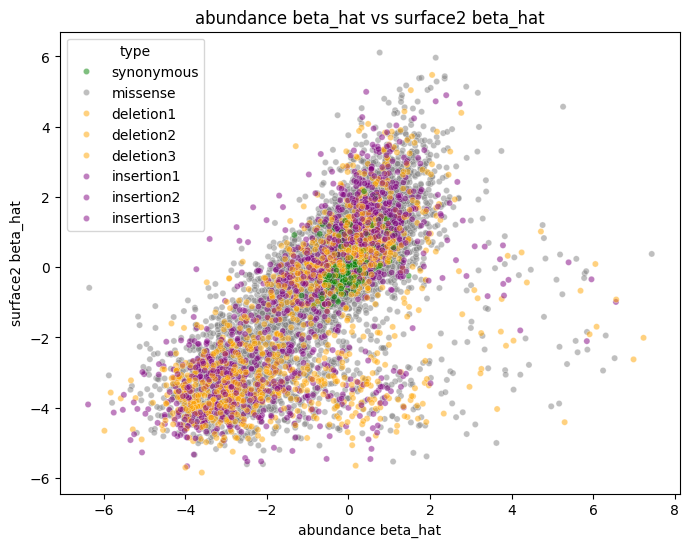

In [5]:
_ = data_obj.plot_scatterplot(
    type_col_dict={
        "synonymous": "green",
        "missense": "grey",
        "deletion1": "orange",
        "deletion2": "orange",
        "deletion3": "orange",
        "insertion1": "purple",
        "insertion2": "purple",
        "insertion3": "purple",
    },
)

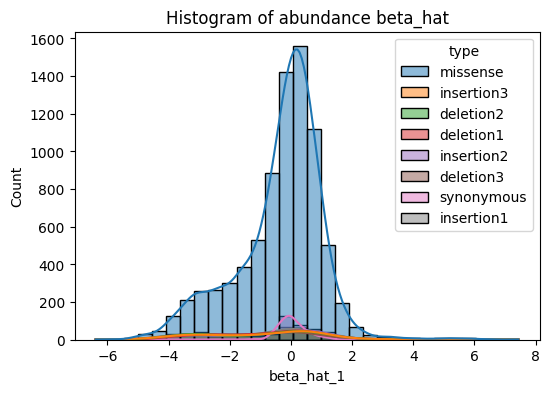

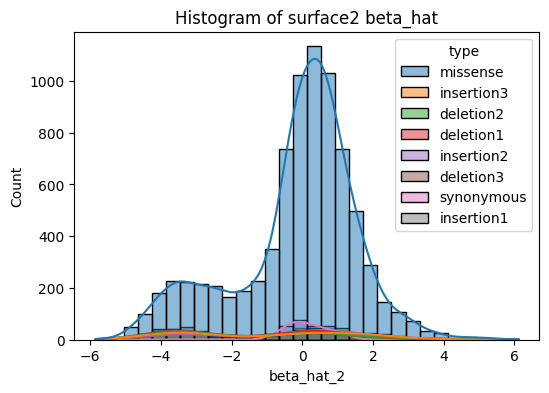

In [6]:
_ = data_obj.plot_histogram(pheno=1)
_ = data_obj.plot_histogram(pheno=2)